# ETL Credits:

### Libreries

In [1]:
import pandas as pd
import ast
import missingno as msno
import json


### Opening CSV Credits data:

In [2]:
df_credits_csv = pd.read_csv('D:\Data Scientist\CURSADO HENRY DTS09\PI\PI1_PT02\PI_ML_OPS_PT02\Datasets\Credits_datasets\Csvs Credits\credits_1.csv')

In [3]:
# Configurar opciones de visualización
pd.set_option('display.width', None)        # No truncar la anchura de la visualización
pd.set_option('display.max_colwidth', None) # Mostrar toda la longitud de los valores en las celdas

In [4]:
df_credits_csv.head(1)

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg'}, {'cast_id': 19, 'character': 'Hamm (voice)', 'credit_id': '52fe4284c3a36847f8024fa9', 'gender': 2, 'id': 7907, 'name': 'John Ratzenberger', 'order': 5, 'profile_path': '/yGechiKWL6TJDfVE2KPSJYqdMsY.jpg'}, {'cast_id': 20, 'character': 'Bo Peep (voice)', 'credit_id': '52fe4284c3a36847f8024fad', 'gender': 1, 'id': 8873, 'name': 'Annie Potts', 'order': 6, 'profile_path': '/eryXT84RL41jHSJcMy4kS3u9y6w.jpg'}, {'cast_id': 26, 'character': 'Andy (voice)', 'credit_id': '52fe4284c3a36847f8024fc1', 'gender': 0, 'id': 1116442, 'name': 'John Morris', 'order': 7, 'profile_path': '/vYGyvK4LzeaUCoNSHtsuqJUY15M.jpg'}, {'cast_id': 22, 'character': 'Sid (voice)', 'credit_id': '52fe4284c3a36847f8024fb1', 'gender': 2, 'id': 12901, 'name': 'Erik von Detten', 'order': 8, 'profile_path': '/twnF1ZaJ1FUNUuo6xLXwcxjayBE.jpg'}, {'cast_id': 23, 'character': 'Mrs. Davis (voice)', 'credit_id': '52fe4284c3a36847f8024fb5', 'gender': 1, 'id': 12133, 'name': 'Laurie Metcalf', 'order': 9, 'profile_path': '/unMMIT60eoBM2sN2nyR7EZ2BvvD.jpg'}, {'cast_id': 24, 'character': 'Sergeant (voice)', 'credit_id': '52fe4284c3a36847f8024fb9', 'gender': 2, 'id': 8655, 'name': 'R. Lee Ermey', 'order': 10, 'profile_path': '/r8GBqFBjypLUP9VVqDqfZ7wYbSs.jpg'}, {'cast_id': 25, 'character': 'Hannah (voice)', 'credit_id': '52fe4284c3a36847f8024fbd', 'gender': 1, 'id': 12903, 'name': 'Sarah Freeman', 'order': 11, 'profile_path': None}, {'cast_id': 27, 'character': 'TV Announcer (voice)', 'credit_id': '52fe4284c3a36847f8024fc5', 'gender': 2, 'id': 37221, 'name': 'Penn Jillette', 'order': 12, 'profile_path': '/zmAaXUdx12NRsssgHbk1T31j2x9.jpg'}]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [5]:
df_credits_csv.shape

(45476, 3)

<Axes: >

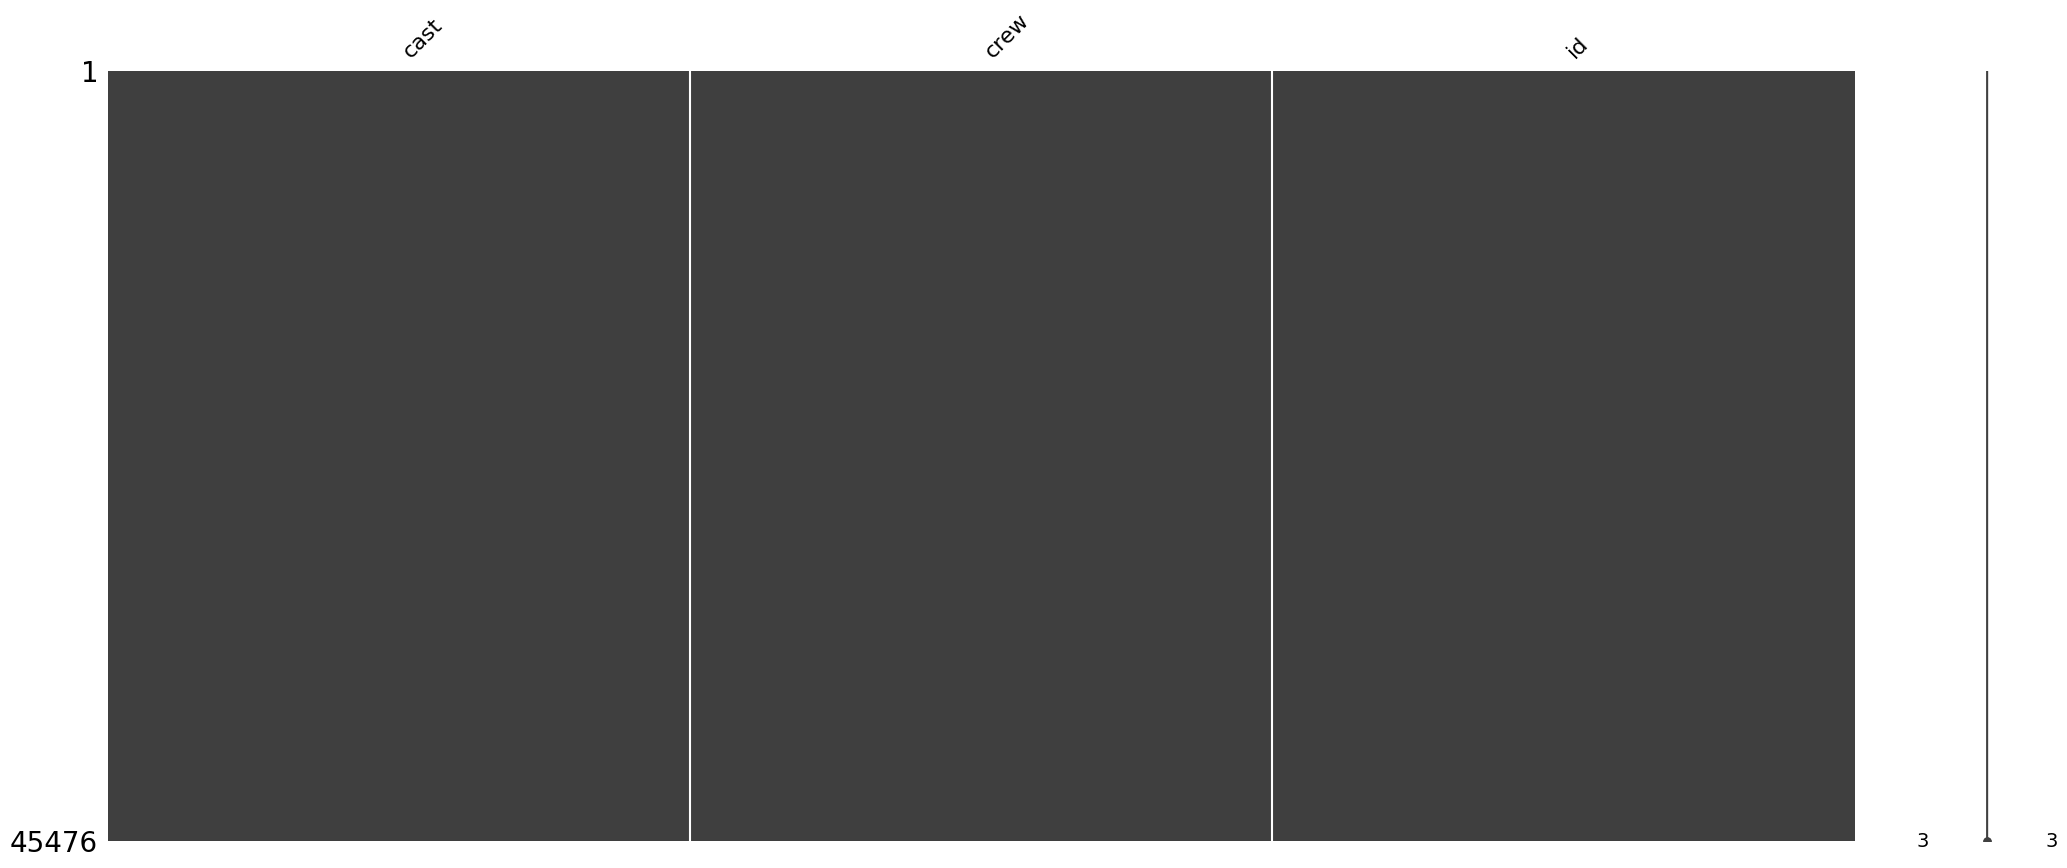

In [6]:
msno.matrix(df_credits_csv)

### Vamos a tener que explorarlo mas al apestoso csv credits 🤧

In [7]:
df_credits_csv.shape

(45476, 3)

In [8]:
df_credits_csv = df_credits_csv.drop_duplicates()

In [9]:
df_credits_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45439 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45439 non-null  object
 1   crew    45439 non-null  object
 2   id      45439 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


elimino la ultima fila que esta vacia

In [10]:
df_credits_csv = df_credits_csv.drop(df_credits_csv.index[-1])

### Separo la columna id y la guardo aparte para asegurarla, debido a que parece estar ok

In [11]:
df_movie_credits_id = pd.DataFrame()
df_movie_credits_id['id']= df_credits_csv['id']
df_movie_credits_id = df_movie_credits_id.drop_duplicates()
print(type(df_movie_credits_id))

<class 'pandas.core.frame.DataFrame'>


### Continuo Explorando las dos primeras columnas, cast y crew

#### Cast:

In [12]:
df_credits_cast = df_credits_csv[['cast','id']]

print(df_credits_cast)

In [13]:
df_credits_cast = df_credits_cast.drop_duplicates()

In [14]:
print(df_credits_cast.iloc[1:2])

In [15]:
iteracion = 0
df_cast_cleaned = pd.DataFrame()

# Iterar a través de la columna 'cast' en df_credits_cast
for row in df_credits_cast['cast']:
    try:
        # Utilizar json.loads para convertir la representación de cadena en una lista de diccionarios
        list_of_dicts = json.loads(row.replace("'", "\""))

        # Verificar si el 'id' de la película existe en la columna 'id' de df_movie_credits_id
        if df_movie_credits_id['id'].isin([d['id'] for d in list_of_dicts]).any():
            # Crear el DataFrame con los datos del cast
            cast_df = pd.DataFrame(list_of_dicts)

            # Obtener el 'id' de la película de df_movie_credits_id
            movie_id = df_movie_credits_id['id'].iloc[iteracion]

            # Agregar el 'movie_id' al DataFrame cast_df
            cast_df['movie_id'] = movie_id

            # Unificar los DataFrames utilizando concat
            df_cast_cleaned = pd.concat([df_cast_cleaned, cast_df], ignore_index=True)

            # Incrementar el contador de iteración
            iteracion += 1
        else:
            # Si el 'id' de la película no existe en df_movie_credits_id, omitimos esta película
            pass
    except json.JSONDecodeError:
        # Omitir las filas que no se pueden decodificar como JSON
        pass


In [16]:
cast_df

,cast_id,character,credit_id,gender,id,name,order,profile_path,movie_id
0,1,Sir Robert Hode,52fe44439251416c9100a887,2,29459,Patrick Bergin,0,/mxFum2Fr5YWD6kDQYb5u7EEvuva.jpg,111815
1,2,Maid Marian,52fe44439251416c9100a88b,1,139,Uma Thurman,1,/6SuOc2R7kXjq3Em24KTNDW9qblJ.jpg,111815
2,3,Little John,52fe44439251416c9100a88f,2,18616,David Morrissey,2,/y8L9zlrIzsAwu2Hufol6KqoDS4I.jpg,111815
3,4,Sir Miles Folcanet,52fe44439251416c9100a893,2,920,Jürgen Prochnow,3,/aar3n9NEQdwWVvPOne3kLLXm75N.jpg,111815
4,14,Baron Roger Daguerre,58207d0d92514168ad013b03,0,1924,Jeroen Krabbé,4,/A5Mks6zi6Xzt9A8fxBWc3wdlvhx.jpg,111815


In [17]:
df_cast_cleaned.shape

(53558, 9)

In [18]:
df_cast_cleaned

,cast_id,character,credit_id,gender,id,name,order,profile_path,movie_id
0,2,Max Goldman,52fe466a9251416c75077a8d,2,6837,Walter Matthau,0,/xJVkvprOnzP5Zdh5y63y8HHniDZ.jpg,862
1,3,John Gustafson,52fe466a9251416c75077a91,2,3151,Jack Lemmon,1,/chZmNRYMtqkiDlatprGDH4BzGqG.jpg,862
2,4,Ariel Gustafson,52fe466a9251416c75077a95,1,13567,Ann-Margret,2,/jx5lTaJ5VXZHYB52gaOTAZ9STZk.jpg,862
3,5,Maria Sophia Coletta Ragetti,52fe466a9251416c75077a99,1,16757,Sophia Loren,3,/emKLhbji1c7BjcA2DdbWf0EP9zH.jpg,862
4,6,Melanie Gustafson,52fe466a9251416c75077a9d,1,589,Daryl Hannah,4,/4LLmp6AQdlj6ueGCRbVRSGvvFSt.jpg,862
...,...,...,...,...,...,...,...,...,...
53553,1,Sir Robert Hode,52fe44439251416c9100a887,2,29459,Patrick Bergin,0,/mxFum2Fr5YWD6kDQYb5u7EEvuva.jpg,111815
53554,2,Maid Marian,52fe44439251416c9100a88b,1,139,Uma Thurman,1,/6SuOc2R7kXjq3Em24KTNDW9qblJ.jpg,111815
53555,3,Little John,52fe44439251416c9100a88f,2,18616,David Morrissey,2,/y8L9zlrIzsAwu2Hufol6KqoDS4I.jpg,111815
53556,4,Sir Miles Folcanet,52fe44439251416c9100a893,2,920,Jürgen Prochnow,3,/aar3n9NEQdwWVvPOne3kLLXm75N.jpg,111815


In [19]:
df_cast_cleaned = df_cast_cleaned.drop(columns=['gender','profile_path','order','credit_id','cast_id'])

In [20]:
df_cast_cleaned.head(20)

,character,id,name,movie_id
0,Max Goldman,6837,Walter Matthau,862
1,John Gustafson,3151,Jack Lemmon,862
2,Ariel Gustafson,13567,Ann-Margret,862
3,Maria Sophia Coletta Ragetti,16757,Sophia Loren,862
4,Melanie Gustafson,589,Daryl Hannah,862
5,Grandpa Gustafson,16523,Burgess Meredith,862
6,Jacob Goldman,7166,Kevin Pollak,862
7,George Banks,67773,Steve Martin,8844
8,Nina Banks,3092,Diane Keaton,8844
9,Franck Eggelhoffer,519,Martin Short,8844


In [21]:
df_cast_cleaned.shape

(53558, 4)

In [22]:
df_cast_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53558 entries, 0 to 53557
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   character  53558 non-null  object
 1   id         53558 non-null  int64 
 2   name       53558 non-null  object
 3   movie_id   53558 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.6+ MB


##### Guardo pickle: df_cast

In [23]:
# Guardar el DataFrame en formato pickle
df_cast_cleaned.to_pickle('../../Datasets Cleaned & light/df_cast.pkl')

##### Confirmacion de Diector id:

In [24]:
# Filtrar el DataFrame por el valor 138 en la columna "id"
df_filtrado = df_cast_cleaned[df_cast_cleaned["id"] == 138].copy()


In [25]:
df_filtrado.tail(50)

,character,id,name,movie_id
405,Destiny,138,Quentin Tarantino,35196
1233,Himself,138,Quentin Tarantino,27793
1330,Bartender,138,Quentin Tarantino,9302
2818,Himself,138,Quentin Tarantino,109
5273,Deacon,138,Quentin Tarantino,319
9831,Sid,138,Quentin Tarantino,454
14458,Quentin Tarantino,138,Quentin Tarantino,10351
16048,Warren,138,Quentin Tarantino,36568
16333,The Rapist,138,Quentin Tarantino,47881
17558,Himself,138,Quentin Tarantino,11485


#### Crew:

In [26]:
df_credits_crew = df_credits_csv['crew']

(df_credits_crew)

0        [{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, 'job': 'Director', 'name': 'John Lasseter', 'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'}, {'credit_id': '52fe4284c3a36847f8024f4f', 'department': 'Writing', 'gender': 2, 'id': 12891, 'job': 'Screenplay', 'name': 'Joss Whedon', 'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'}, {'credit_id': '52fe4284c3a36847f8024f55', 'department': 'Writing', 'gender': 2, 'id': 7, 'job': 'Screenplay', 'name': 'Andrew Stanton', 'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'}, {'credit_id': '52fe4284c3a36847f8024f5b', 'department': 'Writing', 'gender': 2, 'id': 12892, 'job': 'Screenplay', 'name': 'Joel Cohen', 'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'}, {'credit_id': '52fe4284c3a36847f8024f61', 'department': 'Writing', 'gender': 0, 'id': 12893, 'job': 'Screenplay', 'name': 'Alec Sokolow', 'profile_path': '/v79vlRYi94BZUQnkkyznbGUZLjT.jpg'}, {'credit_id': '52fe4284c3a36847f8024f67'

In [27]:
df_credits_crew = df_credits_crew.drop_duplicates()

In [28]:
df_credits_crew

0        [{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, 'job': 'Director', 'name': 'John Lasseter', 'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'}, {'credit_id': '52fe4284c3a36847f8024f4f', 'department': 'Writing', 'gender': 2, 'id': 12891, 'job': 'Screenplay', 'name': 'Joss Whedon', 'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'}, {'credit_id': '52fe4284c3a36847f8024f55', 'department': 'Writing', 'gender': 2, 'id': 7, 'job': 'Screenplay', 'name': 'Andrew Stanton', 'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'}, {'credit_id': '52fe4284c3a36847f8024f5b', 'department': 'Writing', 'gender': 2, 'id': 12892, 'job': 'Screenplay', 'name': 'Joel Cohen', 'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'}, {'credit_id': '52fe4284c3a36847f8024f61', 'department': 'Writing', 'gender': 0, 'id': 12893, 'job': 'Screenplay', 'name': 'Alec Sokolow', 'profile_path': '/v79vlRYi94BZUQnkkyznbGUZLjT.jpg'}, {'credit_id': '52fe4284c3a36847f8024f67'

El proceso siguiente tarda aprox 
#### 9 minutos...

### ver de reemplazar para cast!

In [29]:
import ast
iteracion = 0
df_crew_cleaned = pd.DataFrame()

for row in df_credits_crew:

    # Obtener el valor de la columna 'crew' del primer registro
    crew_string = df_credits_crew.iloc[iteracion]

    # Convertir el string a una lista de diccionarios usando eval()
    crew_list = ast.literal_eval(crew_string)

    # Check if the crew_list is empty, skip the iteration if it is
    if not crew_list:
        iteracion += 1
        continue

    df_crew = pd.DataFrame(crew_list)
    
    #print(f"crew_string: {crew_string}")
    
    # Obtener el 'id' de la película de df_movie_credits_id
    movie_id = df_movie_credits_id['id'].iloc[iteracion]

    # Agregar el 'movie_id' al DataFrame cast_df
    df_crew['movie_id'] = movie_id

    
    #print(f"crew_string: {crew_string}")
    
    
    df_crew = df_crew[df_crew['job'] == 'Director']

    # Unificar los DataFrames utilizando concat
    df_crew_cleaned = pd.concat([df_crew_cleaned, df_crew], ignore_index=True)

    # Incrementar el contador de iteración
    iteracion += 1

    
    

In [30]:
df_crew.tail()


,credit_id,department,gender,id,job,name,profile_path,movie_id
0,533bccebc3a36844cf0011a7,Directing,0,1085341,Director,Yakov Protazanov,/yyjbGdCs2ZN6IlZNCfmBWyuRDlt.jpg,190683


In [31]:
df_crew_cleaned

,credit_id,department,gender,id,job,name,profile_path,movie_id
0,52fe4284c3a36847f8024f49,Directing,2,7879,Director,John Lasseter,/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg,862
1,52fe44bfc3a36847f80a7c7d,Directing,2,4945,Director,Joe Johnston,/fok4jaO62v5IP6hkpaaAcXuw2H.jpg,8844
2,52fe466a9251416c75077a89,Directing,2,26502,Director,Howard Deutch,/68Vae1HkU1NxQZ6KEmuxIpno7c9.jpg,15602
3,52fe44779251416c91011acb,Directing,2,2178,Director,Forest Whitaker,/4pMQkelS5lK661m9Kz3oIxLYiyS.jpg,31357
4,52fe44959251416c75039eef,Directing,2,56106,Director,Charles Shyer,/hnWGd74CbmTcDCFQiJ8SYLazIXW.jpg,11862
...,...,...,...,...,...,...,...,...
49002,52fe44439251416c9100a899,Directing,2,17784,Director,John Irvin,/A75sBHfUrcdG9BGQdwKh4akqWWn.jpg,179236
49003,5894a97d925141426c00818c,Directing,0,1182809,Director,Hamid Nematollah,None,179235
49004,52fe4af1c3a36847f81e9b15,Directing,0,1051381,Director,Lav Diaz,/lWZ6mJCrPga6Jis1gbJYcpWpBZo.jpg,411717
49005,52fe4776c3a368484e0c8387,Directing,2,67753,Director,Mark L. Lester,None,127097


In [32]:
df_crew_cleaned.shape

(49007, 8)

In [33]:
df_crew_cleaned = df_crew_cleaned.drop(columns=['gender','profile_path','credit_id'])

In [34]:
df_crew_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49007 entries, 0 to 49006
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   department  49007 non-null  object
 1   id          49007 non-null  int64 
 2   job         49007 non-null  object
 3   name        49007 non-null  object
 4   movie_id    49007 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.9+ MB


##### Guardo pickle: df_crew

In [35]:
# Guardar el DataFrame en formato pickle
df_crew_cleaned.to_pickle('../../Datasets Cleaned & light/df_crew.pkl')

#### No todas las movies poseen un mismo director...:

In [36]:
# Crear un diccionario para almacenar la cantidad de directores por movie_id
directores_por_movie_id = {}

# Recorrer el dataframe y contar los directores para cada movie_id
for index, row in df_crew_cleaned.iterrows():
    if row['job'] == 'Director':
        movie_id = row['movie_id']
        directores_por_movie_id[movie_id] = directores_por_movie_id.get(movie_id, 0) + 1

# Verificar si hay movie_id con más de dos directores
for movie_id, num_directores in directores_por_movie_id.items():
    if num_directores > 2:
        print(f"El movie_id {movie_id} tiene {num_directores} directores.")


El movie_id 5 tiene 4 directores.
El movie_id 39953 tiene 3 directores.
El movie_id 22317 tiene 3 directores.
El movie_id 15139 tiene 3 directores.
El movie_id 202425 tiene 3 directores.
El movie_id 18444 tiene 3 directores.
El movie_id 173 tiene 5 directores.
El movie_id 15947 tiene 6 directores.
El movie_id 8367 tiene 3 directores.
El movie_id 433 tiene 3 directores.
El movie_id 30892 tiene 4 directores.
El movie_id 903 tiene 12 directores.
El movie_id 9529 tiene 5 directores.
El movie_id 11419 tiene 4 directores.
El movie_id 11003 tiene 3 directores.
El movie_id 943 tiene 7 directores.
El movie_id 20173 tiene 4 directores.
El movie_id 1779 tiene 3 directores.
El movie_id 47908 tiene 3 directores.
El movie_id 2887 tiene 3 directores.
El movie_id 26648 tiene 3 directores.
El movie_id 793 tiene 3 directores.
El movie_id 10340 tiene 4 directores.
El movie_id 11675 tiene 3 directores.
El movie_id 31667 tiene 4 directores.
El movie_id 4478 tiene 3 directores.
El movie_id 9336 tiene 3 dire

#### Listado unico de job == Director ; directors_df 

In [37]:
# Filtrar el DataFrame original para obtener solo las filas con la categoría "Director"
directors_df = df_crew_cleaned[df_crew_cleaned['job'] == 'Director']

# Crear un nuevo DataFrame que contenga solo la columna 'id' (los IDs de los directores)
directors_id_list = directors_df[['id']]

In [38]:
directors_df

,department,id,job,name,movie_id
0,Directing,7879,Director,John Lasseter,862
1,Directing,4945,Director,Joe Johnston,8844
2,Directing,26502,Director,Howard Deutch,15602
3,Directing,2178,Director,Forest Whitaker,31357
4,Directing,56106,Director,Charles Shyer,11862
...,...,...,...,...,...
49002,Directing,17784,Director,John Irvin,179236
49003,Directing,1182809,Director,Hamid Nematollah,179235
49004,Directing,1051381,Director,Lav Diaz,411717
49005,Directing,67753,Director,Mark L. Lester,127097


##### Guardo pickle: df_crew_directores_only

In [39]:
# Guardar el DataFrame en formato pickle
directors_df.to_pickle('../../Datasets Cleaned & light/df_crew_only_directores.pkl')

______________________________________________________________________

### Productos:

In [40]:
df_cast_cleaned

,character,id,name,movie_id
0,Max Goldman,6837,Walter Matthau,862
1,John Gustafson,3151,Jack Lemmon,862
2,Ariel Gustafson,13567,Ann-Margret,862
3,Maria Sophia Coletta Ragetti,16757,Sophia Loren,862
4,Melanie Gustafson,589,Daryl Hannah,862
...,...,...,...,...
53553,Sir Robert Hode,29459,Patrick Bergin,111815
53554,Maid Marian,139,Uma Thurman,111815
53555,Little John,18616,David Morrissey,111815
53556,Sir Miles Folcanet,920,Jürgen Prochnow,111815


In [41]:
df_cast_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53558 entries, 0 to 53557
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   character  53558 non-null  object
 1   id         53558 non-null  int64 
 2   name       53558 non-null  object
 3   movie_id   53558 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.6+ MB


In [42]:
df_crew_cleaned

,department,id,job,name,movie_id
0,Directing,7879,Director,John Lasseter,862
1,Directing,4945,Director,Joe Johnston,8844
2,Directing,26502,Director,Howard Deutch,15602
3,Directing,2178,Director,Forest Whitaker,31357
4,Directing,56106,Director,Charles Shyer,11862
...,...,...,...,...,...
49002,Directing,17784,Director,John Irvin,179236
49003,Directing,1182809,Director,Hamid Nematollah,179235
49004,Directing,1051381,Director,Lav Diaz,411717
49005,Directing,67753,Director,Mark L. Lester,127097


In [43]:
df_crew_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49007 entries, 0 to 49006
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   department  49007 non-null  object
 1   id          49007 non-null  int64 
 2   job         49007 non-null  object
 3   name        49007 non-null  object
 4   movie_id    49007 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.9+ MB


In [44]:
directors_df

,department,id,job,name,movie_id
0,Directing,7879,Director,John Lasseter,862
1,Directing,4945,Director,Joe Johnston,8844
2,Directing,26502,Director,Howard Deutch,15602
3,Directing,2178,Director,Forest Whitaker,31357
4,Directing,56106,Director,Charles Shyer,11862
...,...,...,...,...,...
49002,Directing,17784,Director,John Irvin,179236
49003,Directing,1182809,Director,Hamid Nematollah,179235
49004,Directing,1051381,Director,Lav Diaz,411717
49005,Directing,67753,Director,Mark L. Lester,127097


In [45]:
directors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49007 entries, 0 to 49006
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   department  49007 non-null  object
 1   id          49007 non-null  int64 
 2   job         49007 non-null  object
 3   name        49007 non-null  object
 4   movie_id    49007 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.9+ MB


### Seguimos ahora unificando la info:

#### Se necesita cambiar nombre de algunas columnas para que no falle el join

In [46]:
# agregar la palabra "cast" a todas las columnas excepto "credit_id"
for column in df_cast_cleaned.columns:
    if column not in ['id','cast_id','movie_id']:
        new_column_name =  column + '_cast_df' 
        df_cast_cleaned.rename(columns={column: new_column_name}, inplace=True)


In [47]:
df_cast_cleaned

,character_cast_df,id,name_cast_df,movie_id
0,Max Goldman,6837,Walter Matthau,862
1,John Gustafson,3151,Jack Lemmon,862
2,Ariel Gustafson,13567,Ann-Margret,862
3,Maria Sophia Coletta Ragetti,16757,Sophia Loren,862
4,Melanie Gustafson,589,Daryl Hannah,862
...,...,...,...,...
53553,Sir Robert Hode,29459,Patrick Bergin,111815
53554,Maid Marian,139,Uma Thurman,111815
53555,Little John,18616,David Morrissey,111815
53556,Sir Miles Folcanet,920,Jürgen Prochnow,111815


### Left join directors_df:

In [48]:
# Perform the left join
director_merged_info = pd.merge(directors_df ,df_cast_cleaned , on='movie_id', how='left', suffixes=('_crew', '_cast'))

# Show the result
print(director_merged_info)



      department  id_crew       job              name  movie_id  \
0      Directing     7879  Director     John Lasseter       862   
1      Directing     7879  Director     John Lasseter       862   
2      Directing     7879  Director     John Lasseter       862   
3      Directing     7879  Director     John Lasseter       862   
4      Directing     7879  Director     John Lasseter       862   
...          ...      ...       ...               ...       ...   
99107  Directing    17784  Director        John Irvin    179236   
99108  Directing  1182809  Director  Hamid Nematollah    179235   
99109  Directing  1051381  Director          Lav Diaz    411717   
99110  Directing    67753  Director    Mark L. Lester    127097   
99111  Directing  1085341  Director  Yakov Protazanov    190683   

                  character_cast_df  id_cast    name_cast_df  
0                       Max Goldman   6837.0  Walter Matthau  
1                    John Gustafson   3151.0     Jack Lemmon  
2     

<Axes: >

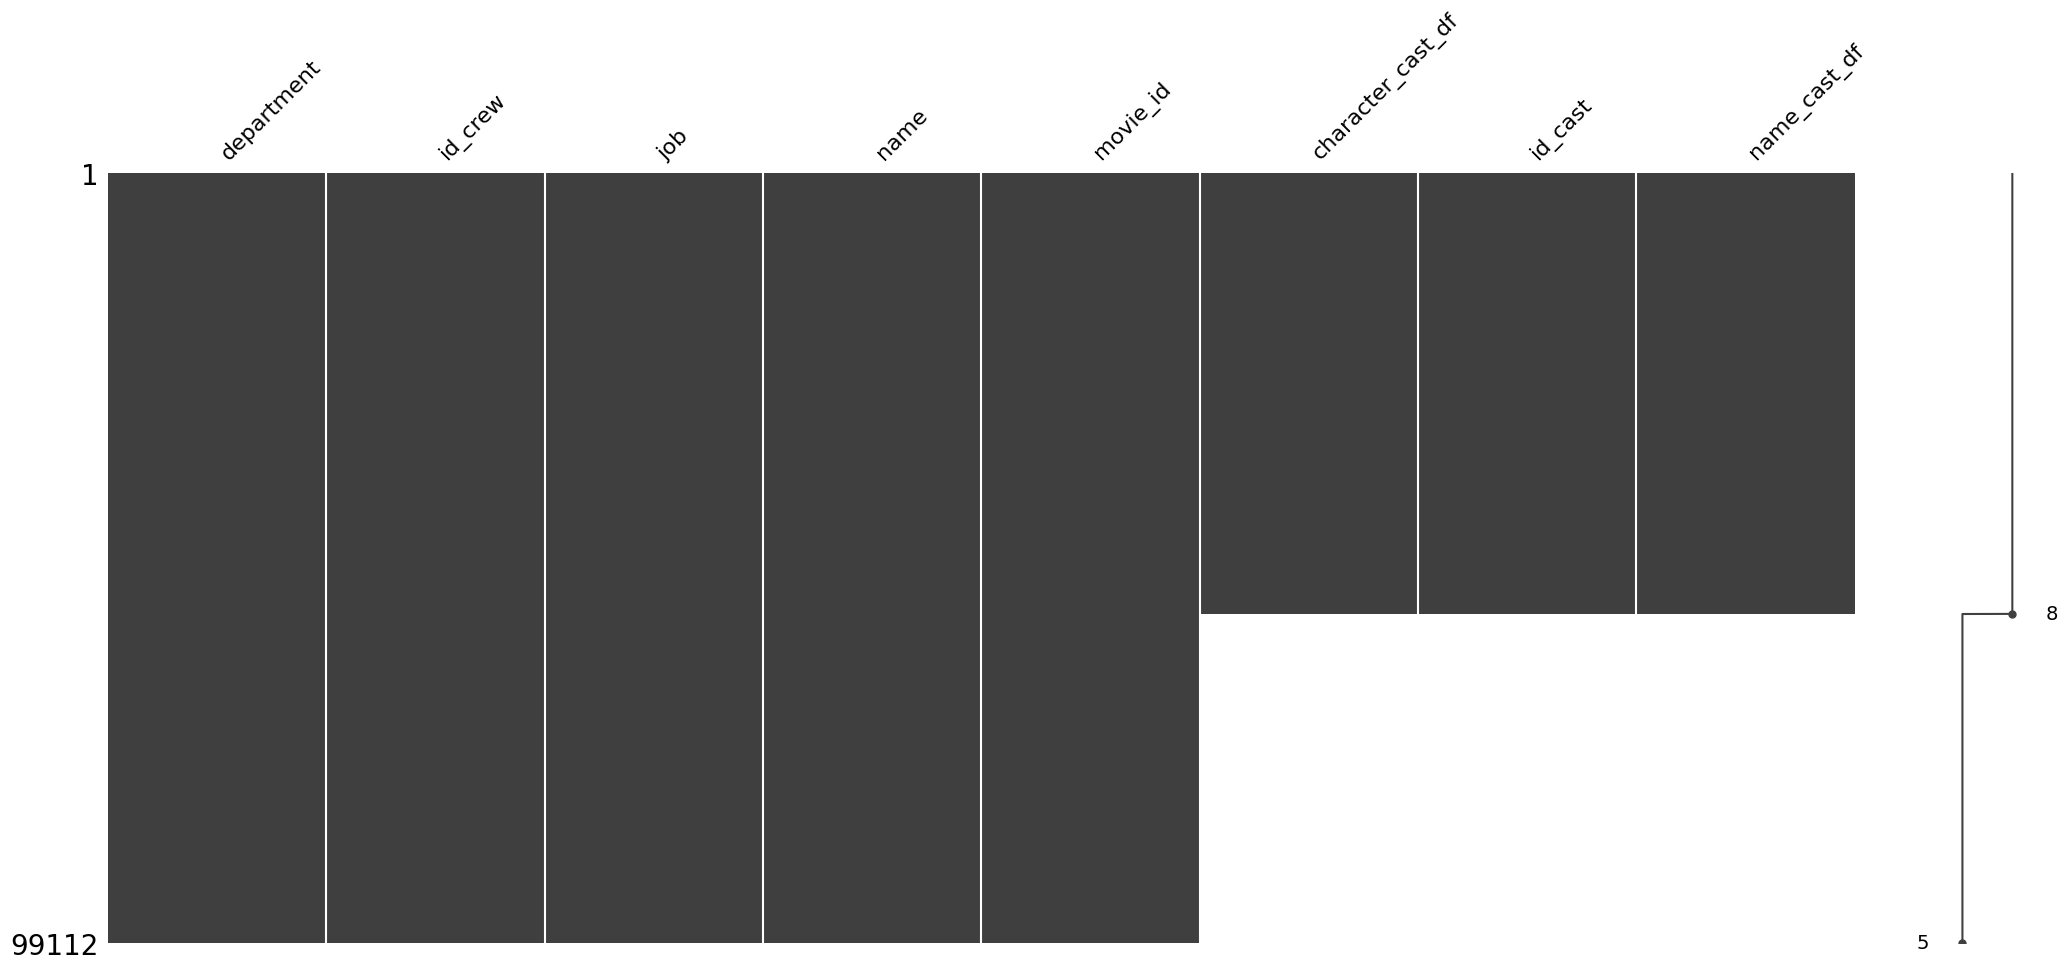

In [49]:
msno.matrix(director_merged_info)

In [50]:
director_merged_info.shape

(99112, 8)

In [51]:
director_merged_info_sin_na = director_merged_info.dropna()

In [52]:
director_merged_info_sin_na.shape

(56764, 8)

In [53]:
director_merged_info_sin_na.head(7)

,department,id_crew,job,name,movie_id,character_cast_df,id_cast,name_cast_df
0,Directing,7879,Director,John Lasseter,862,Max Goldman,6837.0,Walter Matthau
1,Directing,7879,Director,John Lasseter,862,John Gustafson,3151.0,Jack Lemmon
2,Directing,7879,Director,John Lasseter,862,Ariel Gustafson,13567.0,Ann-Margret
3,Directing,7879,Director,John Lasseter,862,Maria Sophia Coletta Ragetti,16757.0,Sophia Loren
4,Directing,7879,Director,John Lasseter,862,Melanie Gustafson,589.0,Daryl Hannah
5,Directing,7879,Director,John Lasseter,862,Grandpa Gustafson,16523.0,Burgess Meredith
6,Directing,7879,Director,John Lasseter,862,Jacob Goldman,7166.0,Kevin Pollak


In [54]:
list_cols_int = ['id_crew','movie_id','id_cast']
for element in list_cols_int:
    director_merged_info_sin_na.loc[:, list_cols_int] = director_merged_info_sin_na[list_cols_int].astype(int)
    

In [55]:
director_merged_info_sin_na.head(5)

,department,id_crew,job,name,movie_id,character_cast_df,id_cast,name_cast_df
0,Directing,7879,Director,John Lasseter,862,Max Goldman,6837.0,Walter Matthau
1,Directing,7879,Director,John Lasseter,862,John Gustafson,3151.0,Jack Lemmon
2,Directing,7879,Director,John Lasseter,862,Ariel Gustafson,13567.0,Ann-Margret
3,Directing,7879,Director,John Lasseter,862,Maria Sophia Coletta Ragetti,16757.0,Sophia Loren
4,Directing,7879,Director,John Lasseter,862,Melanie Gustafson,589.0,Daryl Hannah


In [56]:
director_merged_info_sin_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56764 entries, 0 to 56763
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   department         56764 non-null  object 
 1   id_crew            56764 non-null  int64  
 2   job                56764 non-null  object 
 3   name               56764 non-null  object 
 4   movie_id           56764 non-null  int64  
 5   character_cast_df  56764 non-null  object 
 6   id_cast            56764 non-null  float64
 7   name_cast_df       56764 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.9+ MB


<Axes: >

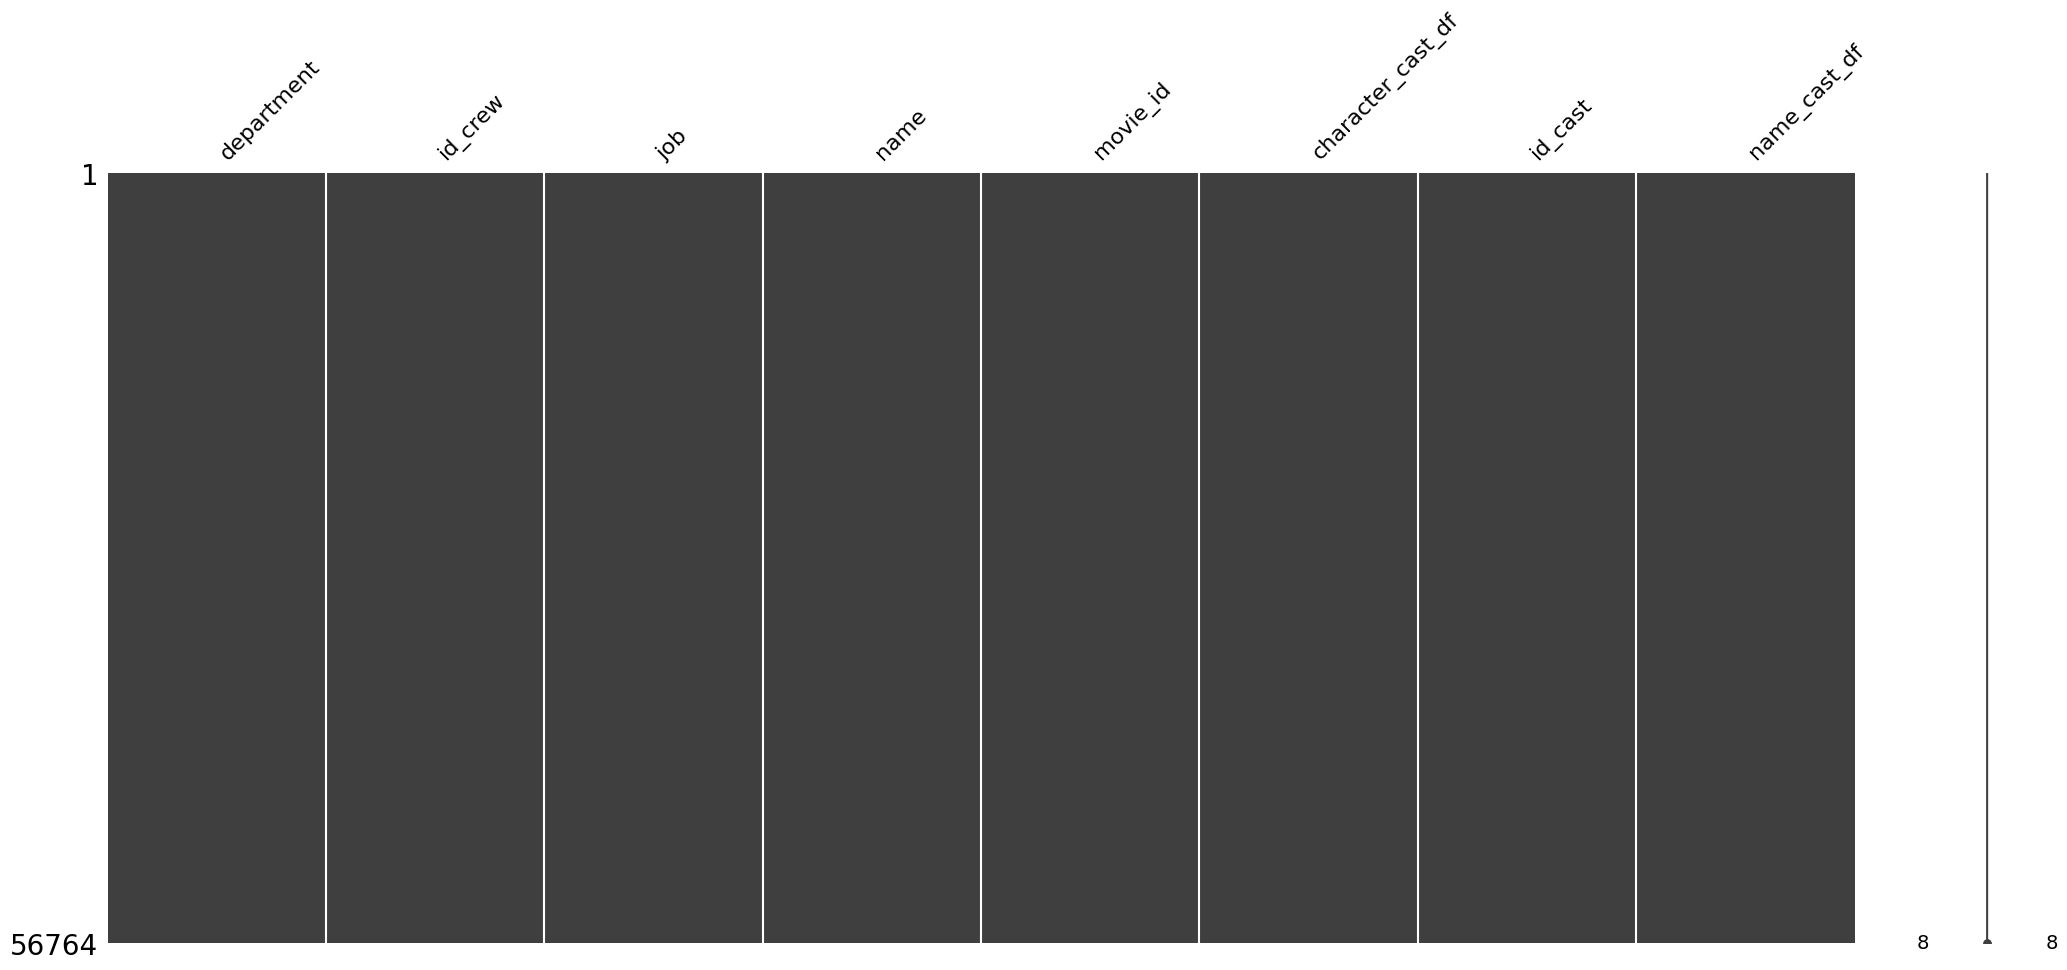

In [57]:
msno.matrix(director_merged_info_sin_na)

In [58]:
director_merged_info_sin_na.drop_duplicates()

,department,id_crew,job,name,movie_id,character_cast_df,id_cast,name_cast_df
0,Directing,7879,Director,John Lasseter,862,Max Goldman,6837.0,Walter Matthau
1,Directing,7879,Director,John Lasseter,862,John Gustafson,3151.0,Jack Lemmon
2,Directing,7879,Director,John Lasseter,862,Ariel Gustafson,13567.0,Ann-Margret
3,Directing,7879,Director,John Lasseter,862,Maria Sophia Coletta Ragetti,16757.0,Sophia Loren
4,Directing,7879,Director,John Lasseter,862,Melanie Gustafson,589.0,Daryl Hannah
...,...,...,...,...,...,...,...,...
56759,Directing,37360,Director,Henry Hathaway,111815,Sir Robert Hode,29459.0,Patrick Bergin
56760,Directing,37360,Director,Henry Hathaway,111815,Maid Marian,139.0,Uma Thurman
56761,Directing,37360,Director,Henry Hathaway,111815,Little John,18616.0,David Morrissey
56762,Directing,37360,Director,Henry Hathaway,111815,Sir Miles Folcanet,920.0,Jürgen Prochnow


In [59]:
director_merged_info_sin_na.head(40)

,department,id_crew,job,name,movie_id,character_cast_df,id_cast,name_cast_df
0,Directing,7879,Director,John Lasseter,862,Max Goldman,6837.0,Walter Matthau
1,Directing,7879,Director,John Lasseter,862,John Gustafson,3151.0,Jack Lemmon
2,Directing,7879,Director,John Lasseter,862,Ariel Gustafson,13567.0,Ann-Margret
3,Directing,7879,Director,John Lasseter,862,Maria Sophia Coletta Ragetti,16757.0,Sophia Loren
4,Directing,7879,Director,John Lasseter,862,Melanie Gustafson,589.0,Daryl Hannah
5,Directing,7879,Director,John Lasseter,862,Grandpa Gustafson,16523.0,Burgess Meredith
6,Directing,7879,Director,John Lasseter,862,Jacob Goldman,7166.0,Kevin Pollak
7,Directing,4945,Director,Joe Johnston,8844,George Banks,67773.0,Steve Martin
8,Directing,4945,Director,Joe Johnston,8844,Nina Banks,3092.0,Diane Keaton
9,Directing,4945,Director,Joe Johnston,8844,Franck Eggelhoffer,519.0,Martin Short


In [60]:
director_merged_info_sin_na.shape

(56764, 8)

¨¨¨¨¨¨  renombrar columnas dep = , id parce ser id del director spike lee


In [61]:
# Filtrar la fila que contiene el campo "id" igual a 34
fila_id_680 = director_merged_info_sin_na.loc[director_merged_info_sin_na['name'] == 'Spike Lee']

# Imprimir la fila que cumple la condición
fila_id_680.head()

,department,id_crew,job,name,movie_id,character_cast_df,id_cast,name_cast_df
1535,Directing,5281,Director,Spike Lee,20649,Flint,1369.0,Bernard Hill
1536,Directing,5281,Director,Spike Lee,20649,Harry,10727.0,John Hannah
3301,Directing,5281,Director,Spike Lee,34152,Hank Mitchell,2053.0,Bill Paxton
3302,Directing,5281,Director,Spike Lee,34152,Sarah Mitchell,2233.0,Bridget Fonda
3303,Directing,5281,Director,Spike Lee,34152,Jacob Mitchell,879.0,Billy Bob Thornton


In [62]:
# Filtrar la fila que contiene el campo "id" igual a 34
fila_id_884 = director_merged_info_sin_na.loc[director_merged_info_sin_na['movie_id'] == 862]

# Imprimir la fila que cumple la condición
fila_id_884.head()

,department,id_crew,job,name,movie_id,character_cast_df,id_cast,name_cast_df
0,Directing,7879,Director,John Lasseter,862,Max Goldman,6837.0,Walter Matthau
1,Directing,7879,Director,John Lasseter,862,John Gustafson,3151.0,Jack Lemmon
2,Directing,7879,Director,John Lasseter,862,Ariel Gustafson,13567.0,Ann-Margret
3,Directing,7879,Director,John Lasseter,862,Maria Sophia Coletta Ragetti,16757.0,Sophia Loren
4,Directing,7879,Director,John Lasseter,862,Melanie Gustafson,589.0,Daryl Hannah


### Guardo pickle: director_merged_info

In [63]:
# Guardar el DataFrame en formato pickle
director_merged_info_sin_na.to_pickle('../../Datasets Cleaned & light/director_merged_info.pkl')

### Creando dataset para ultima funcion:

#### Leer dataset df_movies:

In [64]:
import pandas as pd

# Leer el archivo pickle y guardarlo en un dataframe
df_movies = pd.read_pickle('../../Datasets Cleaned & light/df_movies.pkl')

In [65]:
df_movies.head(3)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,...,genre_ids,genre_names,production_companies_ids,production_companies_nombres,iso_codes,country_names,iso_language_codes,language_names,release_year,return
0,30000000,862,en,"led by woody, andy's toys live happily in his room until andy's birthday brings buzz lightyear onto the scene. afraid of losing his place in andy's heart, woody plots against buzz. but when circumstances separate buzz and woody from their owner, the duo eventually learns to put aside their differences.",21.946943,1995-10-30,373554033,81,released,toy story,...,"16, 35, 10751","animation, comedy, family",3,pixar animation studios,us,united states of america,en,english,1995,12.451801
1,65000000,8844,en,"when siblings judy and peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite alan -- an adult who's been trapped inside the game for 26 years -- into their living room. alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.",17.015539,1995-12-15,262797249,104,released,jumanji,...,"12, 14, 10751","adventure, fantasy, family","559,2550,10201","tristar pictures,teitler film,interscope communications",us,united states of america,"en,fr","english,français",1995,4.043035
2,0,15602,en,"a family wedding reignites the ancient feud between next-door neighbors and fishing buddies john and max. meanwhile, a sultry italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. but she's less interested in seafood than she is in cooking up a hot time with max.",11.712900,1995-12-22,0,101,released,grumpier old men,...,"10749, 35","romance, comedy","6194,19464","warner bros.,lancaster gate",us,united states of america,en,english,1995,0.000000


In [66]:
# Filtrar la fila que contiene el campo "id" igual a 34
fila_id_34 = df_movies.loc[df_movies['id'] == '109']

# Imprimir la fila que cumple la condición
fila_id_34

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,...,genre_ids,genre_names,production_companies_ids,production_companies_nombres,iso_codes,country_names,iso_language_codes,language_names,release_year,return
